<h1>Data Exercise #1 | <code>hotels-vienna</code> Sampling Exercise</h1>

<p>1. Take the hotels-vienna dataset used in this chapter and use your computer to pick samples of
size 25, 50, and 200. Calculate the simple average of hotel price in each sample and compare
them to those in the entire dataset. Repeat this exercise three times and record the results.
Comment on how the average varies across samples of different sizes.</p>

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.utils import resample
import numpy as np

In [9]:
# Download the dataset
df = pd.read_csv('https://osf.io/download/y6jvb/')

<p>Take a first look at the data.</p>

In [10]:
df.head()

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
0,Austria,Vienna,36.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,4.5,...,15-50% offer,2017,11,0,0,2.7,4.4,Apartment,1,4.4
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.4,2.5,Hotel,1,3.7
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,15-50% offer,2017,11,0,0,1.7,2.5,Hotel,1,4.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.2,2.8,Hotel,1,3.9


In [11]:
df.describe()

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,year,month,weekend,holiday,distance,distance_alter,nnights,rating
count,393.000000,428.000000,428.000000,325.000000,325.000000,428.000000,428.000000,428.000000,428.0,428.0,428.0,428.0,428.000000,428.000000,428.0,393.000000
mean,155.048346,131.366822,3.434579,3.990769,556.516923,0.598131,22153.502336,0.679907,2017.0,11.0,0.0,0.0,1.658879,3.718458,1.0,3.970992
std,191.217435,91.580545,0.772278,0.482638,586.874582,0.490850,146.858477,0.467058,0.0,0.0,0.0,0.0,1.595673,1.631341,0.0,0.577444
min,1.000000,27.000000,1.000000,2.000000,2.000000,0.000000,21894.000000,0.000000,2017.0,11.0,0.0,0.0,0.000000,0.600000,1.0,1.000000
25%,27.000000,83.000000,3.000000,3.500000,129.000000,0.000000,22027.750000,0.000000,2017.0,11.0,0.0,0.0,0.700000,2.700000,1.0,3.700000
50%,84.000000,109.500000,3.500000,4.000000,335.000000,1.000000,22155.500000,1.000000,2017.0,11.0,0.0,0.0,1.300000,3.400000,1.0,4.000000
75%,203.000000,146.000000,4.000000,4.500000,811.000000,1.000000,22279.250000,1.000000,2017.0,11.0,0.0,0.0,2.000000,4.400000,1.0,4.400000
max,1541.000000,1012.000000,5.000000,5.000000,3171.000000,1.000000,22409.000000,1.000000,2017.0,11.0,0.0,0.0,13.000000,13.000000,1.0,5.000000


<p>After a quick look, we already know the average price of the entire dataset: <b>131.366</b>. We can proceed and look for different averages obtained from different sample sizes.</p>

In [12]:
# Pick samples of size 25, 50, and 200
sample_25 = df['price'].sample(25)
sample_50 = df['price'].sample(50)
sample_200 = df['price'].sample(200)

<p>We can now check the average prices for each sample.</p>

In [13]:
result_25 = []
for i in range(3):
    sample_25 = df['price'].sample(25)
    avg = sample_25.mean()
    result_25.append(avg)
result_25

[118.08, 121.68, 141.56]

In [14]:
result_50 = []
for i in range(3):
    sample_50 = df['price'].sample(50)
    avg = sample_50.mean()
    result_50.append(avg)
result_50

[122.72, 122.46, 115.42]

In [15]:
result_200 = []
for i in range(3):
    sample_200 = df['price'].sample(50)
    avg = sample_200.mean()
    result_200.append(avg)
result_200

[126.02, 130.92, 144.98]

In [16]:
df_sample = pd.DataFrame(data={
                'sample_25': result_25, 
                'sample_50': result_50, 
                'sample_200': result_200,
                'dataset_avg': [df['price'].mean() for i in range(3)]})

<p>Storing the results in a common dataframe, we get the following results:</p>

In [17]:
df_sample

,sample_25,sample_50,sample_200,dataset_avg
0,118.08,122.72,126.02,131.366822
1,121.68,122.46,130.92,131.366822
2,141.56,115.42,144.98,131.366822


<p><b>Observations:</b></p>
<p><ul>
    <li>A random sampling of size <b>25</b> results on a highly dispersed set of mean values, ranging from 108.56 to 128.14. The mean values tend to be farther from the dataset average.</li>
    <li>The sample of size <b>50</b> has resulted in less variance. Observed values range between 120.10 and 125.26. These results are all closer to the dataset average.</li>
    <li>Interestingly, a sample of size <b>200</b> returned somewhat unexpected results. The range is wide, from 123.02 to 141.40, but all values are closer to the dataset mean than the sample of size 50.</li></p>

<p>We can use this opportunity to observe the distribution of each sample size by the number of values by plotting one histogram per sample size:</p>

     price  type
301   99.0  Data
186   82.0  Data
269   80.0  Data
257  103.0  Data
130  149.0  Data


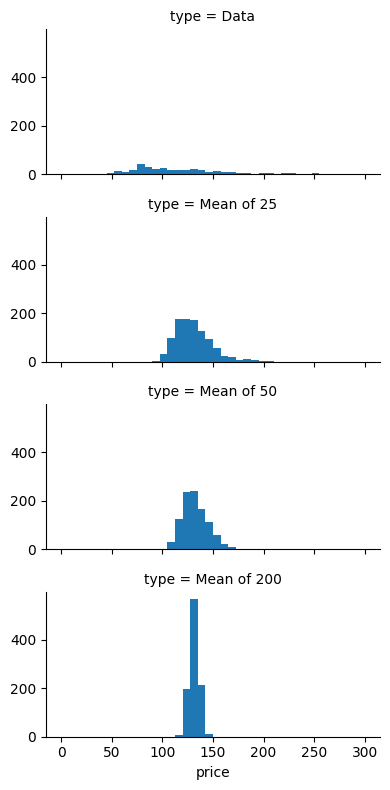

In [20]:
sample_data = pd.DataFrame({
    'price': df['price'].sample(328),
    'type': 'Data',
})

sample_mean_25 = pd.DataFrame({
    'price': [df['price'].sample(25).mean() for _ in range(1000)],
    'type': 'Mean of 25',
})

sample_mean_50 = pd.DataFrame({
    'price': [df['price'].sample(50).mean() for _ in range(1000)],
    'type': 'Mean of 50',
})

sample_mean_200 = pd.DataFrame({
    'price': [df['price'].sample(200).mean() for _ in range(1000)],
    'type': 'Mean of 200'
})

results = pd.concat([sample_data, sample_mean_25, sample_mean_50, sample_mean_200])
print(results.head())
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'price', range=[0,300], bins=40)

<p>As we can see, as we increase the sample size, the narrower becomes the distribution of our sample statistic - aka the <b>Central Limit Theorem</b>. Even if we repeat the process only three times, we can see the same process happening:</p>

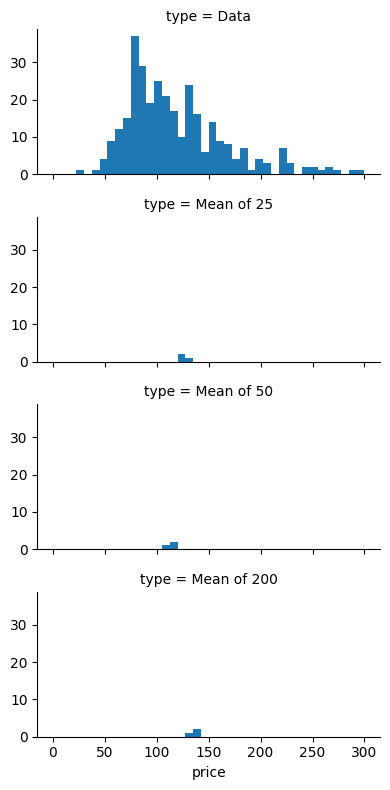

In [21]:
sample_data = pd.DataFrame({
    'price': df['price'].sample(328),
    'type': 'Data',
})

sample_mean_25 = pd.DataFrame({
    'price': [df['price'].sample(25).mean() for _ in range(3)],
    'type': 'Mean of 25',
})

sample_mean_50 = pd.DataFrame({
    'price': [df['price'].sample(50).mean() for _ in range(3)],
    'type': 'Mean of 50',
})

sample_mean_200 = pd.DataFrame({
    'price': [df['price'].sample(200).mean() for _ in range(3)],
    'type': 'Mean of 200'
})

results = pd.concat([sample_data, sample_mean_25, sample_mean_50, sample_mean_200])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'price', range=[0,300], bins=40)

<p>The visualization helps us to understand what happens to the sample distribution of a statistic, in this case, the mean value, when we increase the sample size.</p>
<p>We can also use the <b>bootstrap</b> procedure, a method in which can estimate the sampling distribution of a statistic by drawing additional samples (with replacement) and recalculating the statistic or model for each resample.</p>

In [22]:
results = []
for nrepeat in range(1000):
    sample = resample(df['price'])
    results.append(sample.median())
results = pd.Series(results)
print(f'Bootstrap statistics:')
print(f"original: {df['price'].median()}")
print(f"bias: {results.mean()- df['price'].median()}")
print(f'std.error: {results.std()}')

Bootstrap statistics:
original: 109.5
bias: -0.5264999999999986
std.error: 3.031705623735423


<p>Now, let's take a look at <b>confidence intervals</b>. We can estimate the coverage level of the dataset in a 90% interval.</p\>

In [24]:
print(df['price'].mean())
np.random.seed(seed=3)
# Create a sample of 20 hotel prices data
sample_20 = resample(df['price'], n_samples=20, replace=False)
print(sample_20.mean())

131.36682242990653
113.65


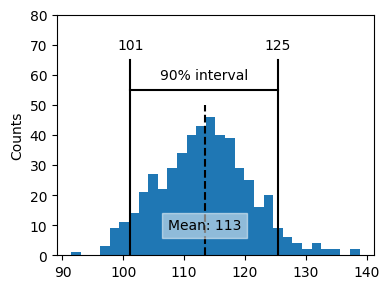

In [25]:
results = []
for nrepeat in range(500):
    sample = resample(sample_20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')

ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

mean_price = results.mean()
ax.plot([mean_price, mean_price], [0, 50], color='black', linestyle='--')
ax.text(mean_price, 10, f'Mean: {mean_price:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

<p><b>Observations:</b></p>
<ul>
    <li>We can see that the data resample presents a normal distribution, with some skew on its right side.</li>
    <li>With a 90% CI, we can affirm that the hotel prices range from <b>€101</b> and <b>€125</b></li>
    <li>The mean is <b>€113</b>, and getting a 101-125 interval is a good improvement.</li>
</ul>
<p>Finally, we can plot a confidence interval for both a 90 and a 95% CI.</p>

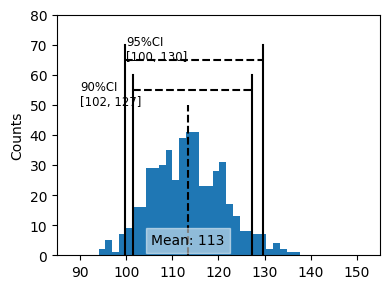

In [37]:
results = []
for nrepeat in range(500):
    sample = resample(sample_20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(90, 50,
        f'90%CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
        fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(100, 65,
        f'95%CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
        fontsize='small')

mean_price = results.mean()
ax.plot([mean_price, mean_price], [0, 50], color='black', linestyle='--')
ax.text(mean_price, 5, f'Mean: {mean_price:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

ax.set_ylim(0, 80)
ax.set_xlim(85, 155),
ax.set_xticks([90, 100, 110, 120, 130, 140, 150])
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

<p><b>Observations:</b></p>
<ul>
    <li>A narrower CI (95%) returns a wider range of possible values. This is the tradeoff: to reduce uncertainty, one must widen the possible outcomes.</p>
    </li>
</ul>

<p>Well, that should be enough for today. We did much more than the exercise asked us. But it was a good way of getting to know more about our dataset.</p> 

<hr>